## Домашняя работа №1

## Шаг 1. Выбор датасета
**Датасет** Я решил выбрать датасет Iris (Hugging Faces: 'iris')
https://huggingface.co/datasets/scikit-learn/iris


## Шаг 2. Загрузка датасета

In [118]:
# устанавливаем нужное
!pip install -q datasets seaborn pandas matplotlib scikit-learn numpy

from datasets import load_dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

dataset = load_dataset("scikit-learn/iris")

**Формулировка задачи**
По признакам цветка ириса предскаазать его вид
- **Тип задачи** классификация

In [119]:
# Исследуем структуру
# кол-во объектов
print("Количество объектов:", {split_name: len(dataset[split_name]) for split_name in dataset})

#  Схема признаков
print("\nСхема признаков (HF features):")
print(dataset["train"].features)

iris_dataframe = dataset["train"].to_pandas()

# EDA

# Проверим размер и список колонок (признаков).
print("\nРазмер таблицы (строки, колонки):", iris_dataframe.shape)
print("Колонки:", sorted(iris_dataframe.columns.tolist()))


all_columns_from_data = set(iris_dataframe.columns)
target_column = "Species"

# Базовые признаки:
# Длина/ширина лепестка
# Длина/ширина чашелистника
candidate_feature_columns = [
    "PetalLengthCm",
    "PetalWidthCm",
    "SepalLengthCm",
    "SepalWidthCm"
]

# Всё, что мы "ожидаем" увидеть:
expected_columns = set([target_column] + candidate_feature_columns)

missing_columns = expected_columns - all_columns_from_data
if missing_columns:
    # если чего-то нет кидаем исключение
    raise ValueError(
        "В датасете не хватает ожидаемых колонок: "
        f"{sorted(missing_columns)}.\n"
        "Проверьте версию датасета/сплита или скорректируйте список признаков."
    )
    


Количество объектов: {'train': 150}

Схема признаков (HF features):
{'Id': Value('int64'), 'SepalLengthCm': Value('float64'), 'SepalWidthCm': Value('float64'), 'PetalLengthCm': Value('float64'), 'PetalWidthCm': Value('float64'), 'Species': Value('string')}

Размер таблицы (строки, колонки): (150, 6)
Колонки: ['Id', 'PetalLengthCm', 'PetalWidthCm', 'SepalLengthCm', 'SepalWidthCm', 'Species']


In [120]:
# Продолжение EDA

# пропуски
print("Количество пропусков в каждой колонке:\n")
print(iris_dataframe.isna().sum())

Количество пропусков в каждой колонке:

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [121]:
# Числовые и категориальные признаки 
numeric_columns = iris_dataframe.select_dtypes(include="number").columns.tolist()
categorical_columns = iris_dataframe.select_dtypes(exclude="number").columns.tolist()

print("\nЧисловые признаки:", numeric_columns)
print("Категориальные признаки:", categorical_columns)

# Не хочется визуализироват и смотреть
if 'Id' in numeric_columns:
    numeric_columns.remove('Id')

# Графики

stats_table = (
    iris_dataframe[numeric_columns]
    .describe()
    .T[["mean", "std", "min", "max"]]
    .round(2)
)

stats_table = stats_table.rename(
    columns={
        "mean": "mean (среднее)",
        "std": "std (стандартное отклонение)",
        "min": "min (минимум)",
        "max": "max (максимум)"
    }
)

print("\nОписание числовых признаков:\n")
stats_table


Числовые признаки: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
Категориальные признаки: ['Species']

Описание числовых признаков:



,mean (среднее),std (стандартное отклонение),min (минимум),max (максимум)
SepalLengthCm,5.84,0.83,4.3,7.9
SepalWidthCm,3.05,0.43,2.0,4.4
PetalLengthCm,3.76,1.76,1.0,6.9
PetalWidthCm,1.20,0.76,0.1,2.5



Распределение классов (species):

Species
Iris-setosa        0.333
Iris-versicolor    0.333
Iris-virginica     0.333
Name: proportion, dtype: float64


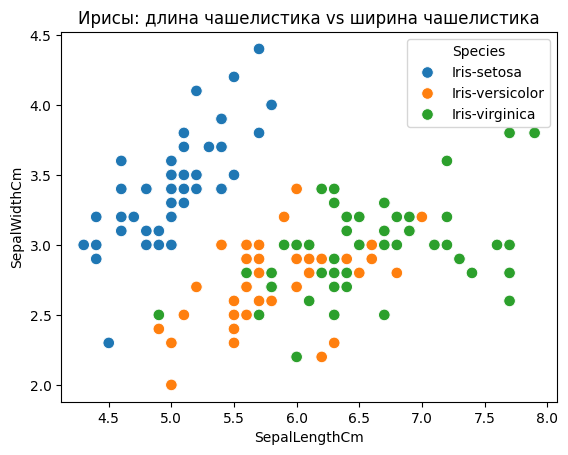

In [122]:
#Графики

# Распределение видов ирисов

print("\nРаспределение классов (species):\n")
print(iris_dataframe["Species"].value_counts(normalize=True).round(3))

# Идеальный баланс каждого вида по 50

# Визуально разделяем SepalLengthCm vs SepalWidthCm
sns.scatterplot(
    data=iris_dataframe,
    x="SepalLengthCm",
    y="SepalWidthCm",
    hue="Species", # покрасим точки, чтобы понимать какой класс
    s=70   # размер точек
)
plt.title("Ирисы: длина чашелистика vs ширина чашелистика")
plt.show()

# Iris-setosa пропорциально выделяется, но остальные 2 вида перемешаны в этих параметрах



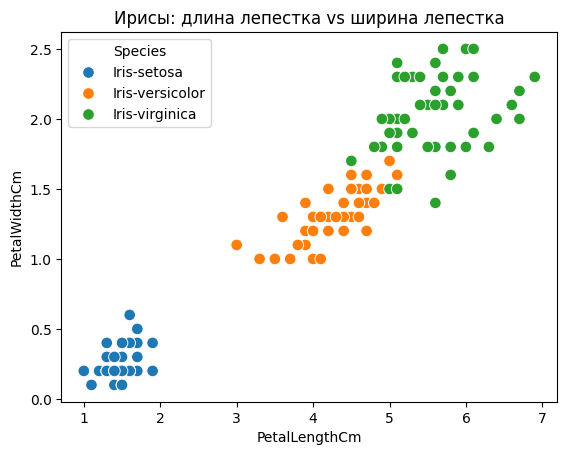

In [123]:
# Визуально разделяем PetalLengthCm vs PetalWidthCm
sns.scatterplot(
    data=iris_dataframe,
    x="PetalLengthCm",
    y="PetalWidthCm",
    hue="Species", # покрасим точки, чтобы понимать какой класс
    s=70   # размер точек
)
plt.title("Ирисы: длина лепестка vs ширина лепестка")
plt.show()

# тут видно что все виды довольно обособлены, но iris-setosa, снова в особенности отделяется от остальных видов

# Подготовка данных


In [124]:
# Вообще все наши признаки - числовые, поэтому просто проверим их на пропуски
print("Признаки", candidate_feature_columns)
print("Целевая переменная:", target_column)

# Сразу смотрим пропуски
print(iris_dataframe[candidate_feature_columns + [target_column]].isna().sum())
# Пропусков нет, нам очень повезло :), можем пропустить импутацию


Признаки ['PetalLengthCm', 'PetalWidthCm', 'SepalLengthCm', 'SepalWidthCm']
Целевая переменная: Species
PetalLengthCm    0
PetalWidthCm     0
SepalLengthCm    0
SepalWidthCm     0
Species          0
dtype: int64


In [125]:
# --- Кодирование категориальной целевой переменной ---
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(iris_dataframe[target_column])

print("\nПосле кодирования:")
print("Закодированные значения:", target_encoded)
print("Соответствие классов:", dict(zip(label_encoder.classes_, range(len(label_encoder.classes_)))))

# Разделяем на train/test

from sklearn.model_selection import train_test_split

X = iris_dataframe[candidate_feature_columns].copy()
y = target_encoded

# Разделяем данные
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,
    stratify=y,
    random_state=42
)

print(f"\nTrain/Test split выполнен.")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")




После кодирования:
Закодированные значения: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Соответствие классов: {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

Train/Test split выполнен.
X_train: (105, 4), X_test: (45, 4)
y_train: (105,), y_test: (45,)


In [126]:
# Масштабируем числовые 

print("ДО МАСШТАБИРОВАНИЯ")
print("X_train статистика:")
print("Среднее:", round(X_train.mean(), 2))
print("Отклонения:", round(X_train.std(), 2))

print("\nX_test статистика:")
print("Среднее:", round(X_test.mean(), 2))
print("Стандартное отклонение:", round(X_test.std(), 2))

# Масштабируем
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("ПОСЛЕ МАСШТАБИРОВАНИЯ")
print("X_train_scaled статистика:")
print("Среднее:", round(X_train_scaled_df.mean(), 2))
print("Стандартное отклонение:", round(X_train_scaled_df.std(), 2))

print("\nX_test_scaled статистика:")
print("Среднее:", round(X_test_scaled_df.mean(), 2))
print("Стандартное отклонение:", round(X_test_scaled_df.std(), 2))



ДО МАСШТАБИРОВАНИЯ
X_train статистика:
Среднее: PetalLengthCm    3.79
PetalWidthCm     1.20
SepalLengthCm    5.87
SepalWidthCm     3.05
dtype: float64
Отклонения: PetalLengthCm    1.78
PetalWidthCm     0.78
SepalLengthCm    0.86
SepalWidthCm     0.45
dtype: float64

X_test статистика:
Среднее: PetalLengthCm    3.70
PetalWidthCm     1.18
SepalLengthCm    5.77
SepalWidthCm     3.06
dtype: float64
Стандартное отклонение: PetalLengthCm    1.74
PetalWidthCm     0.73
SepalLengthCm    0.74
SepalWidthCm     0.39
dtype: float64
ПОСЛЕ МАСШТАБИРОВАНИЯ
X_train_scaled статистика:
Среднее: PetalLengthCm   -0.0
PetalWidthCm     0.0
SepalLengthCm    0.0
SepalWidthCm    -0.0
dtype: float64
Стандартное отклонение: PetalLengthCm    1.0
PetalWidthCm     1.0
SepalLengthCm    1.0
SepalWidthCm     1.0
dtype: float64

X_test_scaled статистика:
Среднее: PetalLengthCm   -0.05
PetalWidthCm    -0.03
SepalLengthCm   -0.12
SepalWidthCm     0.03
dtype: float64
Стандартное отклонение: PetalLengthCm    0.98
PetalWidth

## Шаг 3
# Обучим **Logistic Regression** и **Random Forest**

In [127]:
# Сразу обучаем модель так как данные уже подготовлены
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

lr_classification_model = LogisticRegression(max_iter=1000, solver="lbfgs")
lr_classification_model.fit(X_train_scaled, y_train)

lr_y_pred = classification_model.predict(X_test_scaled)


rf_classification_model = RandomForestClassifier(n_estimators=100, max_depth=3)

rf_classification_model.fit(X_train_scaled, y_train)

rf_y_pred = rf_classification_model.predict(X_test_scaled)




In [ ]:
# Сравниваем результаты
from sklearn.metrics import accuracy_score, f1_score, classification_report

accuracy_lr = accuracy_score(y_test, lr_y_pred)
test_f1_macro_lr = f1_score(y_test, lr_y_pred, average="macro")

accuracy_rf = accuracy_score(y_test, rf_y_pred)
test_f1_macro_rf = f1_score(y_test, rf_y_pred, average="macro")
print("Accuracy (test) lr:", round(accuracy_lr, 3))
print("Accuracy (test) rf:", round(accuracy_rf, 3))

print("F1-macro (test) lr:", round(test_f1_macro_lr, 3))
print("F1-macro (test) rf:", round(test_f1_macro_rf, 3))


Accuracy (test) lr: 0.911
Accuracy (test) rf: 0.889
F1-macro (test) lr: 0.911
F1-macro (test) rf: 0.888


## Модель Linear Regression показала лучше результат

# Шаг 4 сравниваем показатели
Accyrasy и F1-macro уже сделаны
Строим **confusion matrix**.



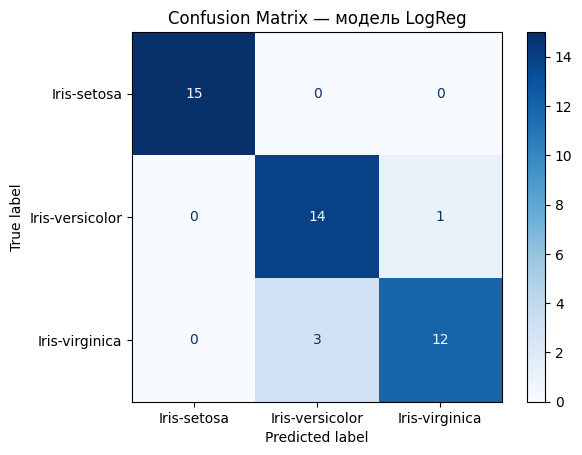

In [133]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, lr_y_pred, display_labels=label_encoder.classes_,  cmap="Blues")
plt.title("Confusion Matrix — модель LogReg")
plt.show()

# видно, что iris-sentosa полностью верно определялся, что в целом не удивительно, так как на визуализации этот класс 
# был как бы обособленен (экземпляры других классов были перемешаны)

In [134]:
print(classification_report(y_test, lr_y_pred, target_names=label_encoder.classes_, digits=3))

                 precision    recall  f1-score   support

    Iris-setosa      1.000     1.000     1.000        15
Iris-versicolor      0.824     0.933     0.875        15
 Iris-virginica      0.923     0.800     0.857        15

       accuracy                          0.911        45
      macro avg      0.916     0.911     0.911        45
   weighted avg      0.916     0.911     0.911        45



Iris-setosa - предсказывались без ошибок, просто идеальный вариант, все показатели на максимальном уровне
Iris-versicolor - путалась с Iris-virginica, чаще ложно предсказывала что ирис Iris-versicolor, однако по уровню recall предсказала почти все объекты именно этого класса правильно
Iris-virginica - высокая точность что предсказанный ирис действительно этого вида, однако хуже всего распозновала реальные Iris-virginica судя по recall

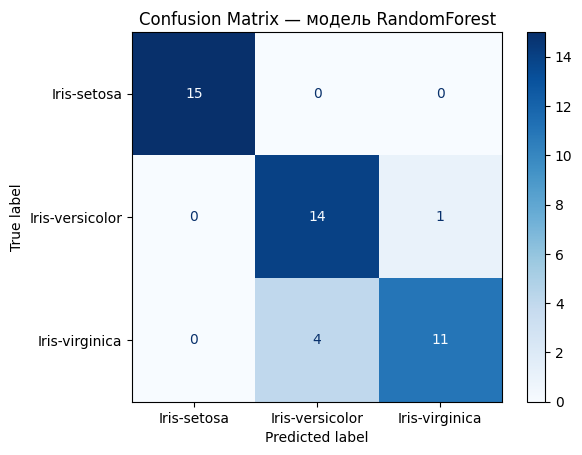

In [138]:
ConfusionMatrixDisplay.from_predictions(y_test, rf_y_pred, display_labels=label_encoder.classes_,  cmap="Blues")
plt.title("Confusion Matrix — модель RandomForest")
plt.show()

In [139]:
print(classification_report(y_test, rf_y_pred, target_names=label_encoder.classes_, digits=3))

                 precision    recall  f1-score   support

    Iris-setosa      1.000     1.000     1.000        15
Iris-versicolor      0.778     0.933     0.848        15
 Iris-virginica      0.917     0.733     0.815        15

       accuracy                          0.889        45
      macro avg      0.898     0.889     0.888        45
   weighted avg      0.898     0.889     0.888        45



В общем, то же самое что на модели LinearReqression, но показатели просто хуже

## Шаг 5. Эксперименты

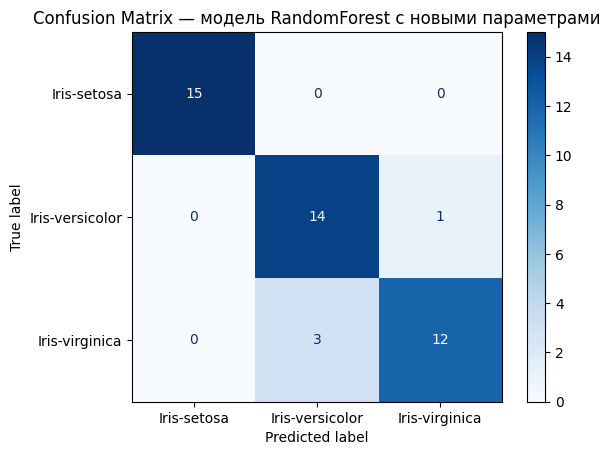

In [140]:
rf_classification_model_new = RandomForestClassifier(n_estimators=5, max_depth=3)

rf_classification_model_new.fit(X_train_scaled, y_train)

rf_y_pred_new = rf_classification_model_new.predict(X_test_scaled)

ConfusionMatrixDisplay.from_predictions(y_test, rf_y_pred_new, display_labels=label_encoder.classes_,  cmap="Blues")
plt.title("Confusion Matrix — модель RandomForest с новыми параметрами")
plt.show()

Я поперебирал параметры у RandomForest и при n_estimator < 3 модели очень сильно ошибались, при n_estimator >= 3, depth >= 3 примерно были одинаковые результаты, модели путали только Iris-versicolor и Iris-virginica и в целом было 4-5 ошибкок, хороший результат достигся при n_estimator = 5 и max_depth = 3

#  Теперь уберем один из признаков
Например SepalLengthCm



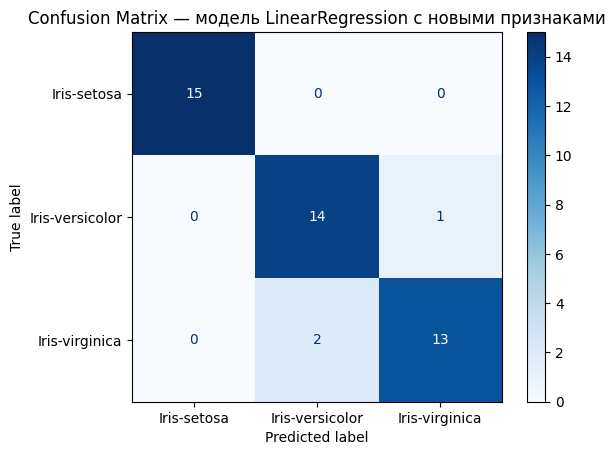

In [141]:
candidate_feature_columns = [
    "PetalLengthCm"
]
XX = iris_dataframe[candidate_feature_columns].copy()
XX_train, XX_test, y_train, y_test = train_test_split(
    XX, y, 
    test_size=0.3,
    stratify=y,
    random_state=42
)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
XX_train_scaled = scaler.fit_transform(XX_train)
XX_test_scaled = scaler.transform(XX_test)


lr_classification_model_new_data = LogisticRegression(max_iter=1000, solver="lbfgs")
lr_classification_model_new_data.fit(XX_train_scaled, y_train)

lr_y_pred_new_data = lr_classification_model_new_data.predict(XX_test_scaled)

ConfusionMatrixDisplay.from_predictions(y_test, lr_y_pred_new_data, display_labels=label_encoder.classes_,  cmap="Blues")
plt.title("Confusion Matrix — модель LinearRegression с новыми признаками")
plt.show()

На самом деле мы не видим отличий, если убирать по одному параметру, однако если оставить все лишь один парамтетр, то результат значительно улучшиться (видимо просто по нему больше всего отличия между видами)

# Вывод
1. Изначально модель Linear Regression показала себя лучше, однако при подстановке разных параметров удалось улучшить Random Forest и его результаты стали выше чем у Linear Regression.
2. Важным признаком был "PetalLengthCm", по нему очень хорошо распознавались виды ирисов и было меньше всего ошибок
3. Модели чаще всего путали Iris-virginica и Iris-versicolor, из-за того что даже при изнальной визуализации видно было что по параметрам эти виды довольно похожи